
Election Data Project - Polls and Donors

In this Data Project we will be looking at data from the 2012 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?

In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
#get data
poll_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


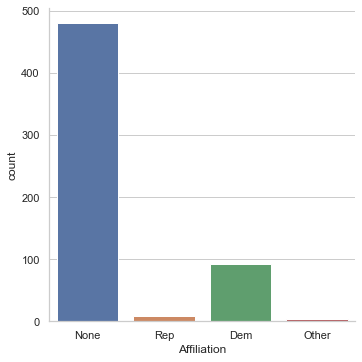

In [6]:
#1.) Who was being polled and what was their party affiliation?
#check affiliation
sns.catplot(data=poll_df,x='Affiliation',kind='count')

Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

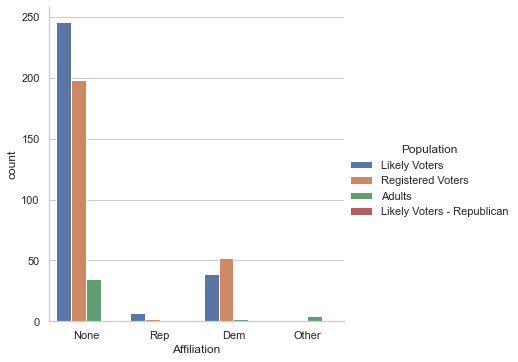

In [7]:
#check affiliation by population
sns.catplot(data=poll_df,x='Affiliation',kind='count',hue='Population')

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

In [9]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [16]:
avg = pd.DataFrame(poll_df.mean()) #average

avg.drop('Number of Observations',axis=0,inplace=True) #dropping the number of observation cols since it is no tneeded

C:\Users\Hein Lin Htet\AppData\Local\Temp/ipykernel_16196/1932752847.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = pd.DataFrame(poll_df.mean()) #average


In [17]:
#i deleted the last two cols cos they are not necesary using del dframe[]
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [18]:
std = pd.DataFrame(poll_df.std()) #for error bar
std.drop('Number of Observations',axis=0,inplace=True)

C:\Users\Hein Lin Htet\AppData\Local\Temp/ipykernel_16196/1079186994.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = pd.DataFrame(poll_df.std()) #for error bar


In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

In [19]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


<AxesSubplot:>

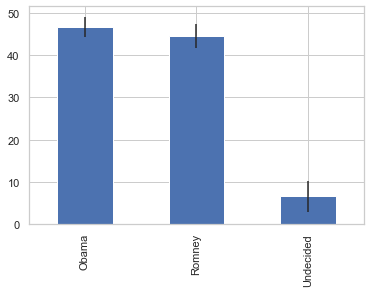

In [20]:
avg.plot(yerr=std,kind='bar',legend=False) #plot avg and std

YERR
Error bars in line plots

errorbar() method is used to create a line plot with error bars. The two positional arguments supplied to ax. errorbar() are the lists or arrays of x, y data points. The two keyword arguments xerr= and yerr= define the error bar lengths in the x and y directions.

In [21]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']

In [22]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754



Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [23]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


<AxesSubplot:xlabel='End Date'>

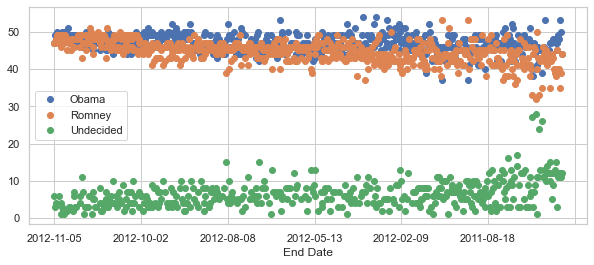

In [24]:
#2.) Did the poll results favor Romney or Obama?
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o',figsize=(10,4)) 
#check the overall votes with normal plot

In [25]:
from datetime import datetime

In [26]:
#ceate new col poll data for difference bet Obama and Romney
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100 

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [27]:
#5.) How did voter sentiment change over time?
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
#we can notice that the dataframe has same enddates, what this cmd is doing is take your full fataframe, group it by the start dates and then set the as index = false so the index remain the same , and the take the average of the resukts of polls from that start date

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


Great! Now plotting the Differencce versus time should be straight forward.

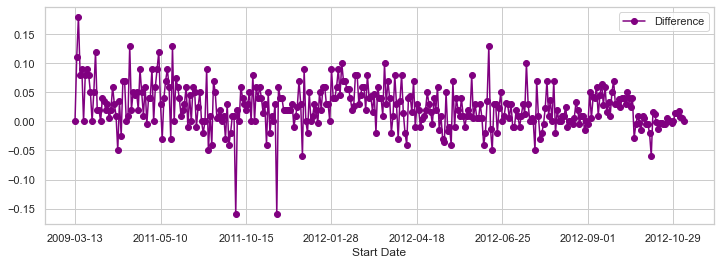

In [37]:
# Plotting the difference in polls between Obama and Romney
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. Here's a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

In [38]:
#6.) Can we see an effect in the polls from the debates?
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

325
352


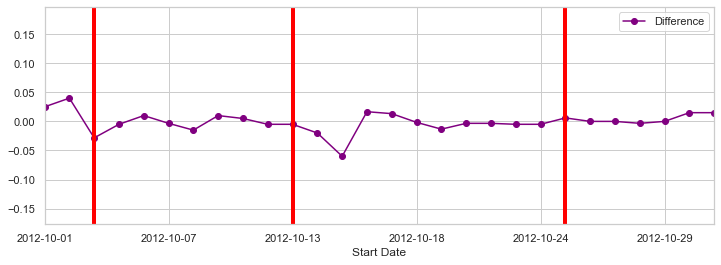

In [39]:
# Start with original figure
fig = poll_df.plot(x='Start Date',y='Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

# Now add the debate markers
#oct 3rd
plt.axvline(x=325+2, linewidth=4, color='red')
#oct 11th
plt.axvline(x=325+10, linewidth=4, color='red')
#oct 22nd
plt.axvline(x=325+21, linewidth=4, color='red')

Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?

2.) How did the donations differ between candidates?

3.) How did the donations differ between Democrats and Republicans?

4.) What were the demographics of the donors?

5.) Is there a pattern to donation amounts?

In [24]:
pwd #my working directory

'c:\\Users\\Hein Lin Htet\\Desktop\\PANDAS\\Lectures\\S9 Data Projects\\Election Analysis'

In [41]:
#get the data
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\Hein Lin Htet\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [43]:
 donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [44]:
#1.) How much was donated and what was the average donation?

donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [45]:
#average donation
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print ('The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


Wow! That's a huge standard deviation! Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [46]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [47]:
# Get rid of the negative values
top_donor = top_donor[top_donor >0]

# Sort the Series
top_donor.sort_values(inplace=True)

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

<AxesSubplot:>

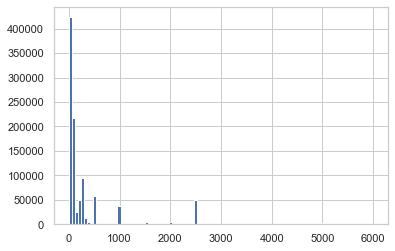

In [48]:
#check the top donors that are less than 2500
com_don = top_donor[top_donor < 25000] 

com_don.hist(bins=100,range=[0,6000])

Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates



In [49]:
candidates = donor_df['cand_nm'].unique() #find the unique names

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's go ahead and seperate Obama from the Republican Candidates by adding a Party Affiliation column. We can do this by using map along a dictionary of party affiliations.

In [50]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df['cand_nm'].map(party_map)

In [57]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [52]:
# Clear refunds which are negative
donor_df = donor_df[donor_df['contb_receipt_amt'] > 0]

In [60]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [61]:
#2.) How did the donations differ between candidates?
# Groupby candidate and then display the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [62]:
# total number of donors received
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

This isn't super readable, and an important aspect of data science is to clearly present information. Let's go ahead and just print out these values in a clean for loop.

In [63]:
#clean the last values lile + in the sum and present
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print (" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don)) #%.Of meas only numbers
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 





This is okay, but its hard to do a quick comparison just by reading this information. How about just a quick graphic presentation?

<AxesSubplot:xlabel='cand_nm'>

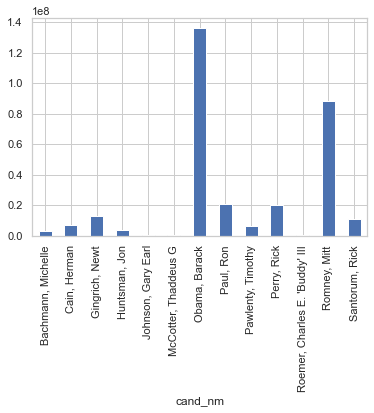

In [65]:
# PLot out total donation amounts
cand_amount.plot(kind='bar')


Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees. How about we just compare Democrat versus Republican donations?

<AxesSubplot:xlabel='Party'>

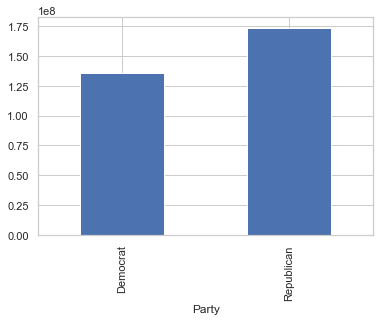

In [111]:
#3.) How did the donations differ between Democrats and Republicans?
#Demo vs Repub (sum of donor)
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')


Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [112]:
#4.) What were the demographics of the donors?
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [114]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [115]:
# Check size
occupation_df.shape

(45067, 2)

Wow! This is probably far too large to display effectively with a small, static visualization. What we should do is have a cut-off for total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars.

In [119]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(axis=1) > 1000000]
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
BANKER,224084.40,1259468.73
BUSINESS OWNER,449979.30,1323342.43
C.E.O.,1690.00,2592983.11
CEO,2073284.79,1618057.41
CHAIRMAN,496547.00,1296092.75
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09


In [121]:
occupation_df.shape

(31, 2)

<AxesSubplot:xlabel='contbr_occupation'>

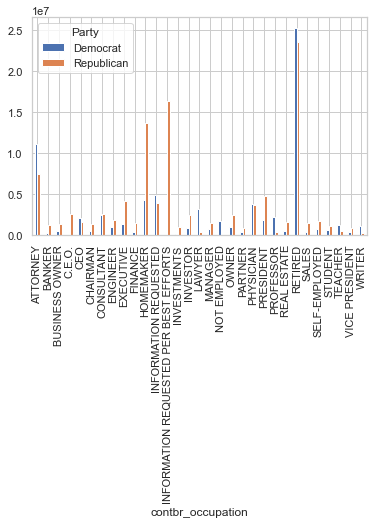

In [122]:
#lets plot
occupation_df.plot(kind='bar')

<AxesSubplot:ylabel='contbr_occupation'>

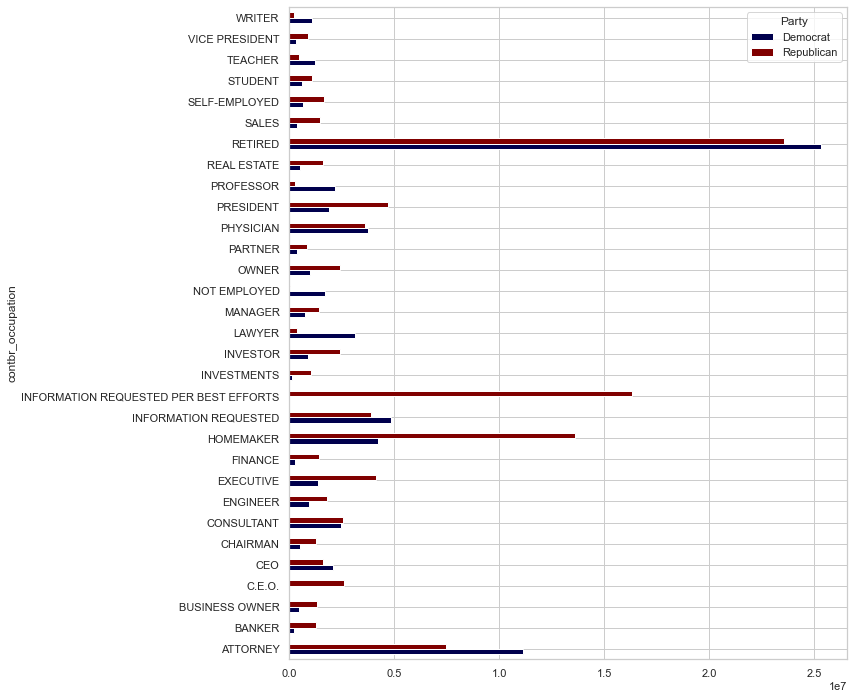

In [124]:
#horizonal plot (barh)
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [125]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [126]:
#Combine the CEO

# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

<AxesSubplot:ylabel='contbr_occupation'>

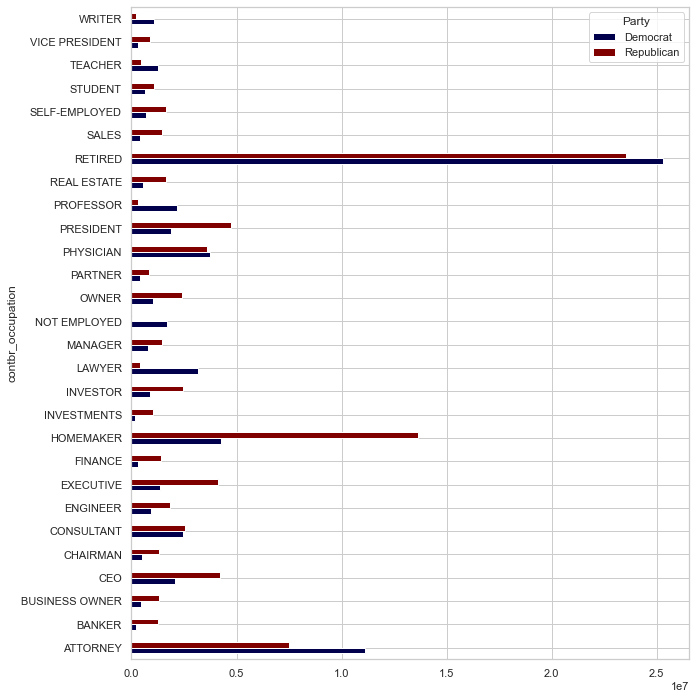

In [127]:
#horizonal plot (barh)
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [128]:
#if you interested in politics
url = 'https://fivethirtyeight.com/politics/'